In [1]:
using LinearAlgebra, Distributions, Parameters, Distances, Plots
include("SteinVariate.jl")

transport! (generic function with 2 methods)

In [5]:
## Problem Setup
# Initial Particles
θ₀ = 4. .+ 5randn(2, 256)
# Model
model = BANANA2(μₚ=[0.0,1.0], Σₚ=10, μₘ=13, Σₘ=20)
# Kernel
K = genRBF()
# Algorithm
alg = SVGD(1024, 64, Momentum(1e0,0.9)) 

SVGD(1024, 64, Momentum(1.0, 0.9))

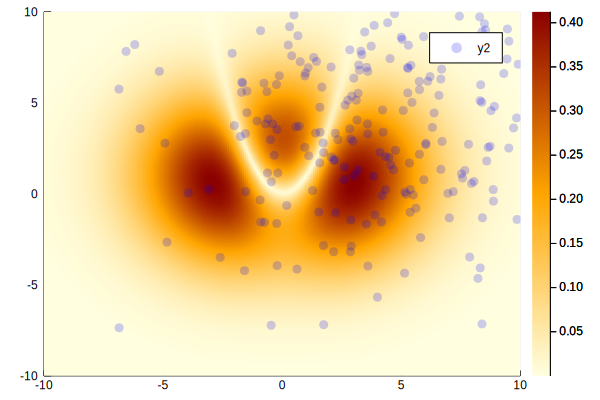

In [6]:
plot(model, [-10.0,10.0], 256)
plot!(θ₀[1,:], θ₀[2,:], linetype=:scatter,  marker=(5,.2,:blue), markerstrokealpha=0, xlim=(-10,10), ylim=(-10,10) )

In [7]:
## Solution
# Transport Particles
history = transport!(θ₀, model, K, alg);
## Animation

In [8]:
I,Z = plot_p(model, [-10.,10.], 100)
anim = @animate for idx in 1:size(history,3)
    Plots.contour(I,I,Z, fill=true, color=:heat)
    Plots.plot!(history[1,:,idx], history[2,:,idx], linetype=:scatter,  marker=(5,.2,:blue), markerstrokealpha=0, xlim=(-10,10), ylim=(-10,10) )
end
gif(anim, "./test.gif", fps=12);

┌ Info: Saved animation to 
│   fn = C:\Users\Felipe\Google Drive\MIT\18 2 Julia\project\Demo\test.gif
└ @ Plots C:\Users\Felipe\.julia\packages\Plots\rmogG\src\animation.jl:90
